## CMEMS Timeseries plotting

CMEMS data are provided in the netcdf file formats. This allows relatively easy data analysis and visualisation. This short tutorial will show you how to generate a time series plot for both an area and a point location. There is also and extra section at the end where we look at visulaization options including producing animations. 

#### imports & basic setup

In [2]:
%matplotlib inline

import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
# replace with your path to the directory where your netcdf is
DATA_PATH = os.path.join("C:\\", "Users","docle","Desktop","SST_short_course", "CMEMS") # "/Users"
INFILE = "global-analysis-forecast-phy-001-024_1618340754893.nc" # replace with your file
#INFILE = "dataset-wav-l4-swh-nrt-global_1600246539189.nc"

#### Open netcdf & get variable data out

In [4]:
nc_data = nc.Dataset(os.path.join(DATA_PATH, INFILE))
nc_time_var = nc_data.variables['time']
nc_time_var.ncattrs()

['long_name',
 'standard_name',
 'calendar',
 'units',
 'axis',
 '_CoordinateAxisType',
 'valid_min',
 'valid_max']

In [5]:
nc_time_var[:]

masked_array(data=[622404., 622428., 622452., 622476., 622500., 622524.,
                   622548., 622572., 622596., 622620., 622644., 622668.,
                   622692., 622716., 622740., 622764., 622788., 622812.,
                   622836., 622860., 622884., 622908., 622932., 622956.,
                   622980., 623004., 623028., 623052., 623076., 623100.,
                   623124.],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [9]:
nc_data.variables['thetao'].dimensions

('time', 'depth', 'latitude', 'longitude')

In [6]:
cal = nc_time_var.getncattr('calendar')
date_units = nc_time_var.getncattr('units')

print(cal)
print(date_units)
print(nc_time_var[:])

gregorian
hours since 1950-01-01 00:00:00
[622404. 622428. 622452. 622476. 622500. 622524. 622548. 622572. 622596.
 622620. 622644. 622668. 622692. 622716. 622740. 622764. 622788. 622812.
 622836. 622860. 622884. 622908. 622932. 622956. 622980. 623004. 623028.
 623052. 623076. 623100. 623124.]


In [7]:
dtime = nc.num2date(nc_time_var[:],date_units,calendar=cal, only_use_cftime_datetimes=False)

In [8]:
dtime

masked_array(data=[real_datetime(2021, 1, 1, 12, 0),
                   real_datetime(2021, 1, 2, 12, 0),
                   real_datetime(2021, 1, 3, 12, 0),
                   real_datetime(2021, 1, 4, 12, 0),
                   real_datetime(2021, 1, 5, 12, 0),
                   real_datetime(2021, 1, 6, 12, 0),
                   real_datetime(2021, 1, 7, 12, 0),
                   real_datetime(2021, 1, 8, 12, 0),
                   real_datetime(2021, 1, 9, 12, 0),
                   real_datetime(2021, 1, 10, 12, 0),
                   real_datetime(2021, 1, 11, 12, 0),
                   real_datetime(2021, 1, 12, 12, 0),
                   real_datetime(2021, 1, 13, 12, 0),
                   real_datetime(2021, 1, 14, 12, 0),
                   real_datetime(2021, 1, 15, 12, 0),
                   real_datetime(2021, 1, 16, 12, 0),
                   real_datetime(2021, 1, 17, 12, 0),
                   real_datetime(2021, 1, 18, 12, 0),
                   real_datetime(2021

In [9]:
means = []
nc_sst_data = nc_data.variables['thetao'][:]  
tsm = tsm_data.variables['tsm']
# replace 'CHL' with the variable you are woking with
print(nc_sst_data.shape)
timesteps = nc_sst_data.shape[0]
#holder = np.ndarray()
for x in range(timesteps):
    means.append(np.nanmean(nc_sst_data[x,:]))
    #holder = holder + nc_sst_data[x,:]

#holder / timesteps

(31, 1, 301, 301)


[16.05376230141989, 16.017441172145, 15.990977419022418, 15.958656174195067, 15.92542172573618, 15.879742956928798, 15.802356830367826, 15.73204913362602, 15.662463853045837, 15.599250659275462, 15.541814704440826, 15.503351580456329, 15.46666174323784, 15.441263295483802, 15.426085155095203, 15.426624283649698, 15.39432121645588, 15.336082394954097, 15.264560723247337, 15.185474966764863, 15.110074820818689, 15.051795053738338, 15.010050323125556, 14.932244147752378, 14.858425964388953, 14.823844026458662, 14.820874080795074, 14.792443019032468, 14.702789758146844, 14.612639769060936, 14.54583128796052]


<Figure size 432x288 with 0 Axes>

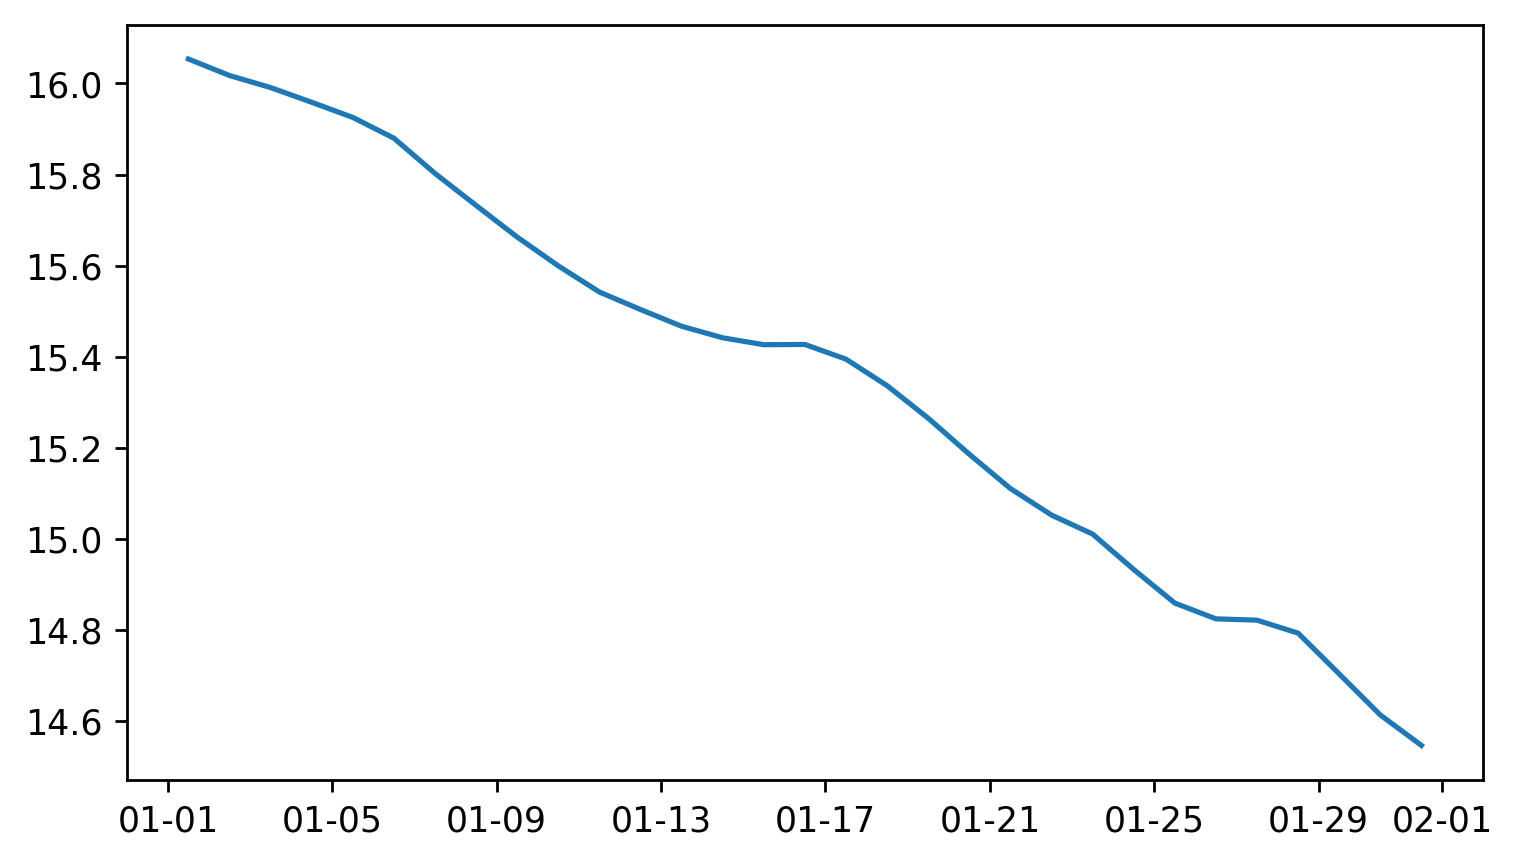

In [10]:
print(means)
plt.clf()
fig1, ax = plt.subplots(figsize=(7, 4), dpi=250)
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.plot(dtime,means)
plt.show()

## single point

In [11]:
LAT = 35.9
LON = -75.22
# change above to match the are of your file

lat_var = nc_data.variables['latitude'][:]
lon_var = nc_data.variables['longitude'][:]

lat_index = np.argmin(np.abs(lat_var - LAT))   
lon_index = np.argmin(np.abs(lon_var - LON))

print(lat_index,lon_index)


71 57


In [12]:
nc_sst_data.shape

(31, 1, 301, 301)

In [13]:
point_values = []
nc_sst_data = nc_data.variables['thetao'][:]
timesteps = nc_sst_data.shape[0]
for x in range(timesteps):
    print(nc_sst_data[x,:,lat_index,lon_index])
    point_values.append(nc_sst_data[x,:,lat_index,lon_index]) 

[18.626148261129856]
[18.462080754339695]
[18.19840083271265]
[17.939115576446056]
[17.399304181337357]
[14.66875210404396]
[12.32053591310978]
[12.011444449424744]
[11.824671171605587]
[11.503860600292683]
[11.417432181537151]
[11.39619129896164]
[11.596148572862148]
[11.333201095461845]
[10.717947944998741]
[10.188390769064426]
[10.397869817912579]
[12.033417776226997]
[14.306924656033516]
[17.17957091331482]
[18.216711938381195]
[18.155919067561626]
[17.880520038306713]
[16.289651177823544]
[15.51106296479702]
[14.848933383822441]
[13.57667776197195]
[12.927732177078724]
[10.841731019318104]
[9.598773166537285]
[9.217902168631554]


<Figure size 432x288 with 0 Axes>

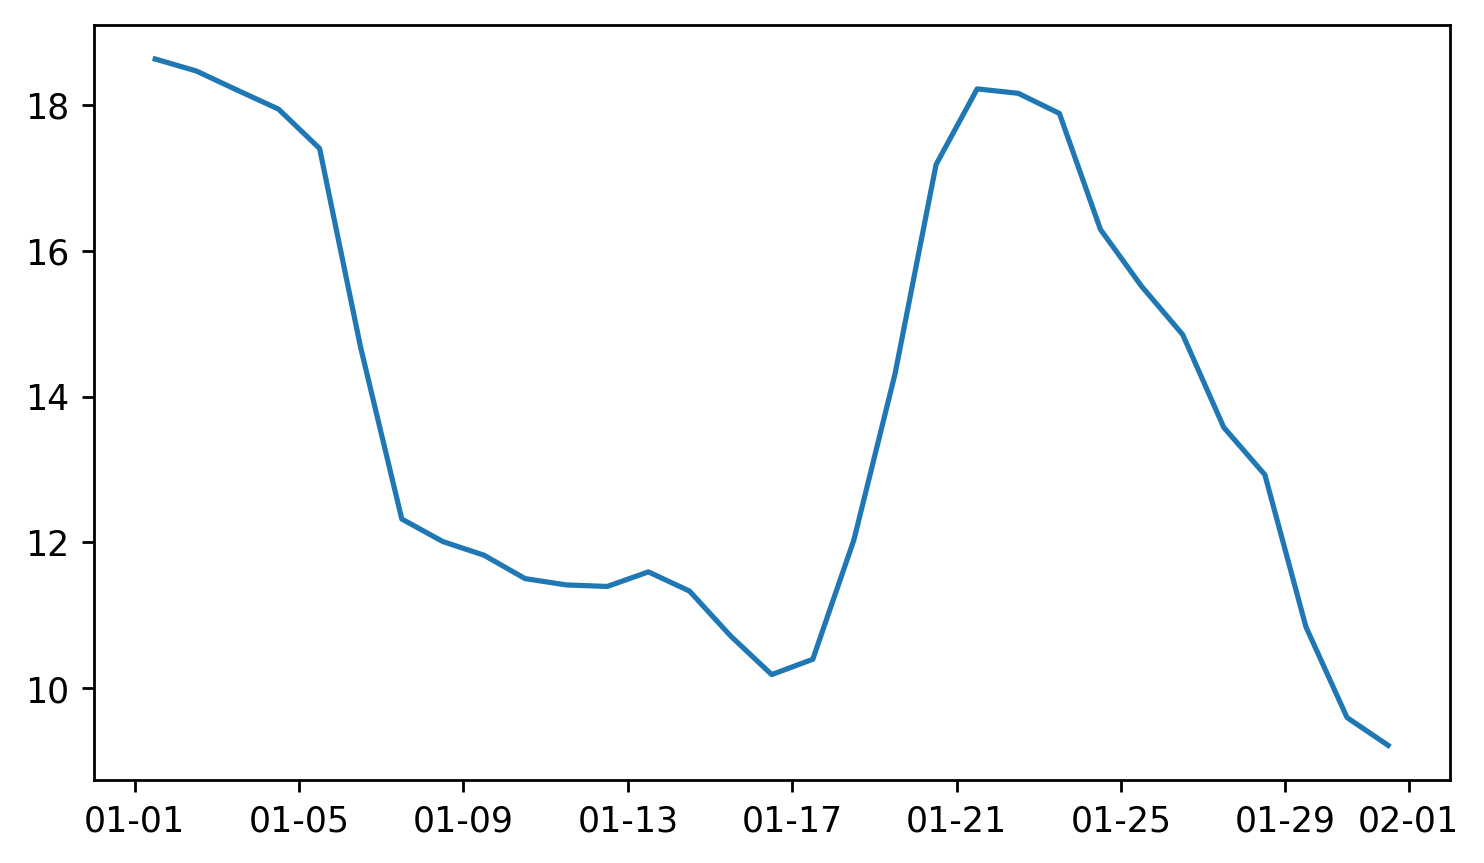

In [14]:
plt.clf()
fig1, ax = plt.subplots(figsize=(7, 4), dpi=250)
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.plot(dtime,point_values)
plt.show()

## Area

In [15]:
LAT = [35,36]
LON = [-76,-75]

lat_var = nc_data.variables['latitude'][:]
lon_var = nc_data.variables['longitude'][:]

lat_min_index = np.argmin(np.abs(lat_var - LAT[0]))
lat_max_index = np.argmin(np.abs(lat_var - LAT[1]))

lon_min_index = np.argmin(np.abs(lon_var - LON[0]))
lon_max_index = np.argmin(np.abs(lon_var - LON[1]))


print(lat_min_index,lat_max_index)
print(lon_min_index,lon_max_index)

60 72
48 60


In [16]:
means = []
ref_line = []
nc_sst_data = nc_data.variables['thetao'][:]
print(nc_sst_data.shape)
timesteps = nc_sst_data.shape[0]
for x in range(timesteps):
    area_mean = np.nanmean(nc_sst_data[x,:,lat_min_index:lat_max_index,lon_min_index:lon_max_index])
    print(area_mean)
    means.append(area_mean)
    ref_line.append(15)

(31, 1, 301, 301)
16.915690713969525
16.67976356187137
16.765161980933044
16.171601768466644
15.18680761673022
14.393953907943796
13.245189527166076
12.832399983191863
12.40788560936926
11.726660978514701
11.731444754870608
12.137161634280346
12.579586558334995
13.21845531289
14.019285797083285
14.45593700063182
14.190603357274085
15.227847382309847
15.815548040962312
15.835478535038419
15.278632089437451
14.93946463469183
14.711531424662098
13.928044990869239
13.760870318335947
14.171868807286955
13.874885562225245
13.272061074734665
11.221160017652437
10.143854726746213
9.846190537442453


<Figure size 432x288 with 0 Axes>

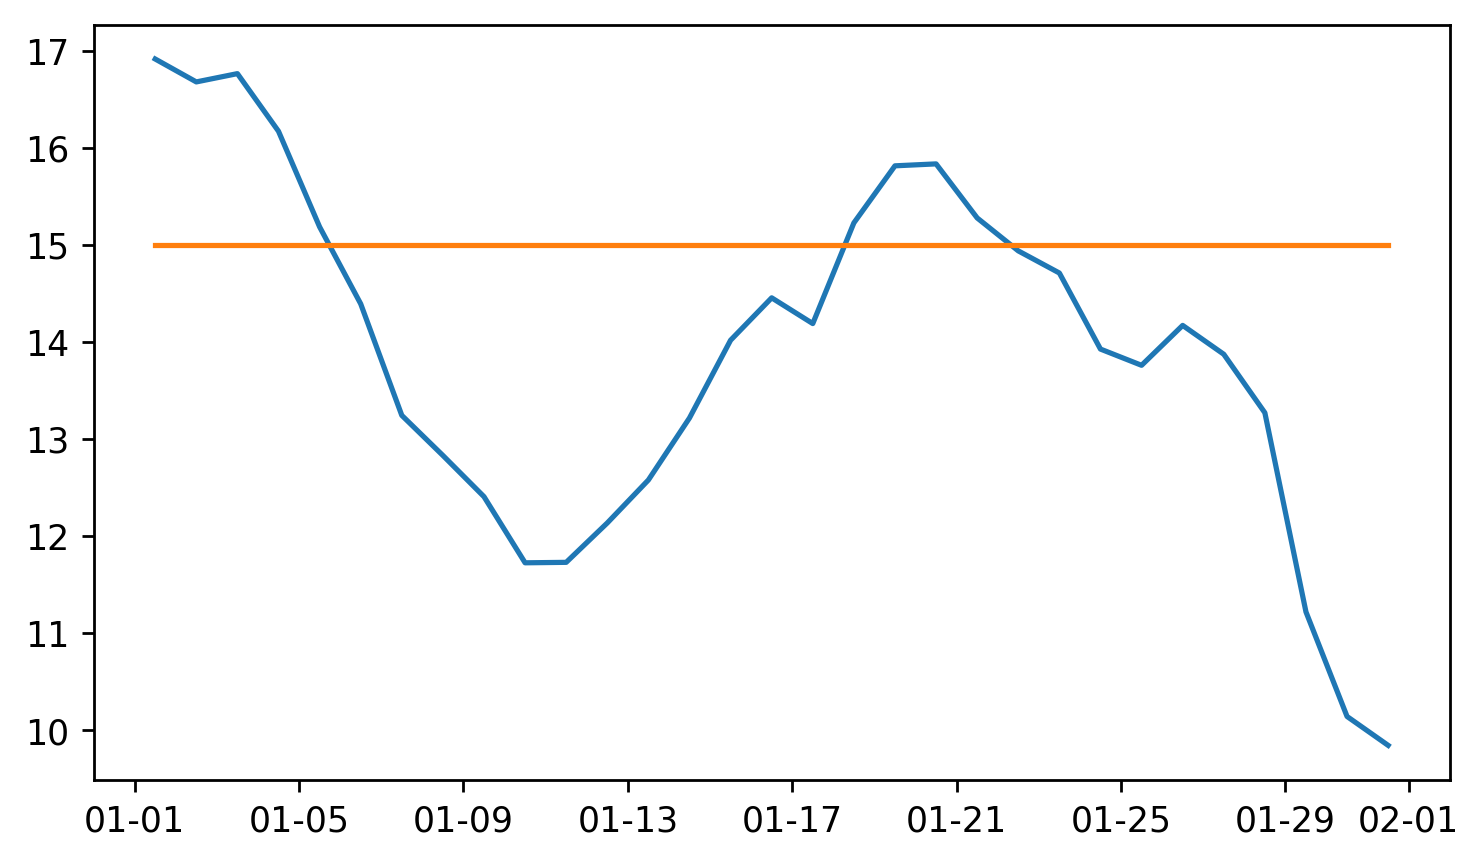

In [17]:
plt.clf()

fig1, ax = plt.subplots(figsize=(7, 4), dpi=250)
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
plt.plot(dtime,means)
plt.plot(dtime,ref_line)
plt.show()

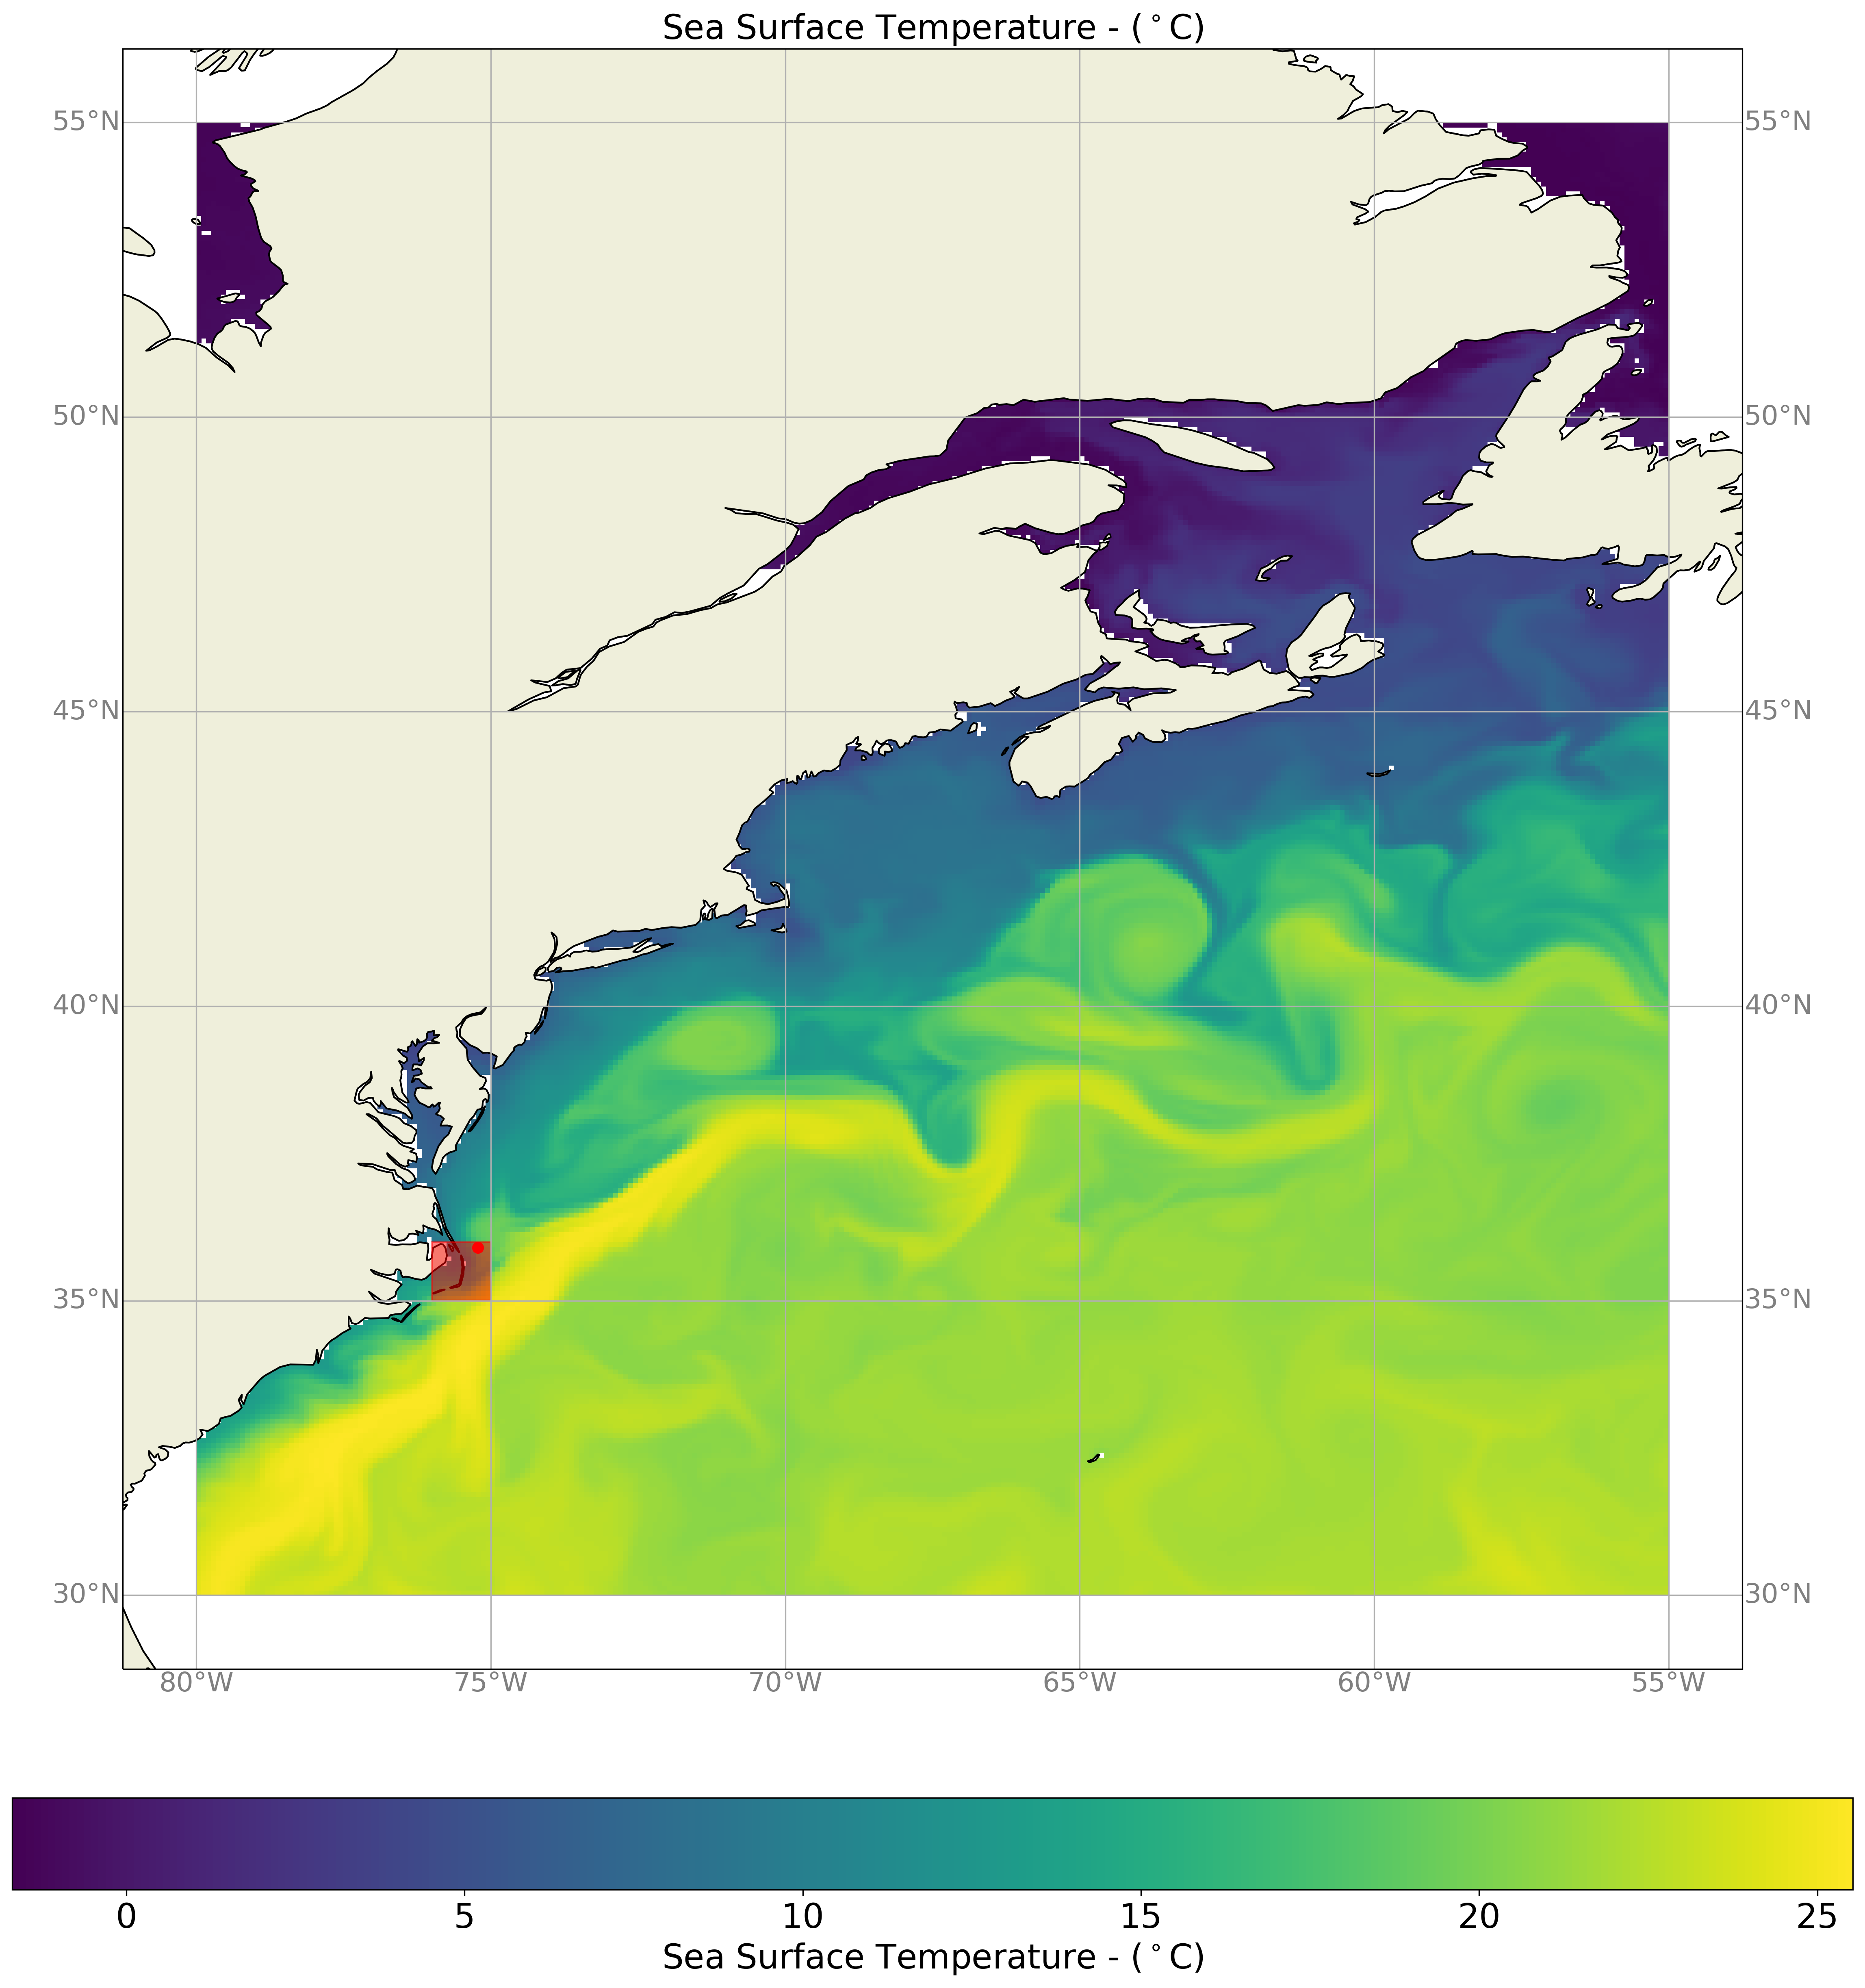

In [18]:
from shapely.geometry.polygon import LinearRing
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

land_resolution = '50m'
land_poly = cfeature.NaturalEarthFeature('physical', 'land', land_resolution,
                                        edgecolor='k',
                                        facecolor=cfeature.COLORS['land'])
LAT = [48.5,49.75]
LON = [-7.2,-5.9]
lons = [-7.2, -7.2, -5.9, -5.9]
lats = [48.5, 49.75,49.75, 48.5]


LAT = [35,36]
LON = [-76,-75]

lons = [-76, -76, -75, -75]
lats = [35,36,36,35]
ring = LinearRing(list(zip(lons, lats)))




fig1 = plt.figure(figsize=(20, 20), dpi=300)

m = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
f1 = plt.pcolormesh(lon_var, lat_var, np.ma.masked_invalid(nc_sst_data[3,0]), shading='flat', vmin=np.nanmin(nc_sst_data[3]), vmax=np.nanmax(nc_sst_data[3]), cmap=plt.cm.viridis)
m.coastlines(resolution=land_resolution, color='black', linewidth=1)
m.add_feature(land_poly)
g1 = m.gridlines(draw_labels = True)
g1.xlabels_top = False
g1.xlabel_style = {'size': 16, 'color': 'gray'}
g1.ylabel_style = {'size': 16, 'color': 'gray'}
cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07)#, ticks=[np.log10(0.01), np.log10(0.1),np.log10(0.5), np.log10(1),np.log10(3),np.log10(10),np.log10(50)]) 
#cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20) 
plt.setp(cbar.ax.get_xticklabels(),fontsize=20) 
cbar.set_label('Sea Surface Temperature - ($^\circ$C)', fontsize=20)

# add area overlay
m.add_geometries([ring], ccrs.PlateCarree(), facecolor='red',alpha=0.5, edgecolor='red')

# add a single point overlay
m.scatter([-75.22],[35.9],transform=ccrs.PlateCarree(),c="red")


plt.title('Sea Surface Temperature - ($^\circ$C)', fontsize=20);
plt.show()

In [20]:
%%capture
import os
import re
import imageio
from pygifsicle import optimize


#make images
for i, image in enumerate(range(nc_sst_data.shape[0])):
    ##
    fig1 = plt.figure(figsize=(4, 4), dpi=300)

    m = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
    f1 = plt.pcolormesh(lon_var, lat_var, np.ma.masked_invalid(nc_sst_data[i,0]), shading='flat', vmin=np.nanmin(nc_sst_data[3]), vmax=np.nanmax(nc_sst_data[3]), cmap=plt.cm.viridis)
    m.coastlines(resolution=land_resolution, color='black', linewidth=0.1)
    m.add_feature(land_poly)
    g1 = m.gridlines(draw_labels = True, linewidth=0.2)
    g1.xlabels_top = False
    g1.xlabel_style = {'size': 6, 'color': 'gray'}
    g1.ylabel_style = {'size': 6, 'color': 'gray'}
    cbar = plt.colorbar(f1, orientation="horizontal", fraction=0.05, pad=0.07)#, ticks=[np.log10(0.01), np.log10(0.1),np.log10(0.5), np.log10(1),np.log10(3),np.log10(10),np.log10(50)]) 
    #cbar.ax.set_xticklabels(['0.01','0.1','0.5','1','3','10','50'], fontsize=20)
    plt.setp(cbar.ax.get_xticklabels(),fontsize=8) 
    cbar.set_label('Sea Surface Temperature - ($^\circ$C)', fontsize=8)
    plt.title('Sea Surface Temperature - ($^\circ$C)'+dtime[i].strftime("%m/%d/%Y, %H:%M:%S"), fontsize=8);
    fig1.savefig("source_images/"+str(i)+".png")

def chop_fname(x):
    return int(x.split(".")[0])


image_path = sorted(os.listdir('source_images'),key=chop_fname)
#print(image_path)
image_list = []
for file_name in image_path:
    #print("adding image"+file_name)
    image_list.append(imageio.imread("source_images/"+file_name))
    
imageio.mimwrite('animated_from_images.gif', image_list, fps=2.0)

gif_path = 'animated_from_images.gif'# path to existing unoptimized gif
#optimize(gif_path, destination='animated_from_images_optimized.gif')# if we excluded the second parameter the function would overrighht our existing gif

![](animated_from_images.gif "segment")